## Notebook for Hung 2019 (Drosophila) anndata file creation 
### Developed by: Anna Maguza

### Institute of Computational Biology - Computational Health Centre - Hemlholtz Munich

### 2nd April 2023

#### Load packages

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import h5py
from scipy.io import mmread
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
import scipy as sci

#### Setup Cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/anna.maguza/miniconda3/envs/scanpy_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.3.5 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.8


## Data Upload

In [4]:
# Upload metadata
meta = pd.read_csv('/Users/anna.maguza/Desktop/Data/Gut_project/Interspecies_analysis/Drosophila/Hung_2019/GSE120537_metadata.csv', index_col=0)


In [5]:
# Upload countmatrix (csv)
countmatrix = pd.read_csv('/Users/anna.maguza/Desktop/Data/Gut_project/Interspecies_analysis/Drosophila/Hung_2019/GSE120537_counts.csv', index_col=0)

In [7]:
countmatrix.head()

,BloodGut_G1_AAAGATGGTATCTGCA,BloodGut_G1_AAAGCAACATCAGTCA,BloodGut_G1_AACTCTTCAGCGATCC,BloodGut_G1_AACTCTTCATGTAAGA,BloodGut_G1_AAGGTTCCAACACCCG,BloodGut_G1_AATCGGTGTCAAGCGA,BloodGut_G1_ACACCCTCAAACTGTC,BloodGut_G1_ACACCGGTCACTTCAT,BloodGut_G1_ACAGCCGCAGGCAGTA,BloodGut_G1_ACATACGCAATCCAAC,...,hbc02123-CTCCTTAC:AGACGAGG-AATGAATG,hbc02123-CTCCTTAC:AATCCGGC-AATGAATG,hbc02123-CTCCTTAC:ATAAGCTA-GTTTGTTT,hbc02123-CTCCTTAC:GTTACTAG-GGCCCTTA,hbc02123-CTCCTTAC:GGCTATAA-TGACCCTC,hbc02123-CTCCTTAC:ATTCTGAG-AAATCGTT,hbc02123-CTCCTTAC:CCGATACG-CTTTAATC,hbc02123-CTCCTTAC:CCGTAGCT-CTTTAATC,hbc02123-CTCCTTAC:AATCCGGC-AGCGCCTT,hbc02123-CTCCTTAC:ACCCATGC-TCGGTACG
FBgn0000008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0000014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0000015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0000017,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
FBgn0000018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Make a dataframe with features (genes) from the index column in countmatrix
features = pd.DataFrame(countmatrix.index, columns=['gene_names'])
# Make 'gene_names as index
features = features.set_index('gene_names')

In [11]:
#Name index in meta as 'cell_ID'
meta.index.name = 'cell_ID'

In [12]:
#COnvert countmatrix to sparse matrix
countmatrix_sparse = sci.sparse.csr_matrix(countmatrix)

In [18]:
# Create anndata object
adata = an.AnnData(X=np.transpose(countmatrix_sparse), var = features, obs = meta)


/var/folders/gb/wwnzrh015q9dns5cmsc3xcjsxglkqz/T/ipykernel_47960/1383521233.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = an.AnnData(X=np.transpose(countmatrix_sparse), var = features, obs = meta)


In [19]:
adata.obs

,cell,library,nGenes,nUMI,nMito,pctMito,lognGenes,lognUMI,complexity,complexity_pass,mito_pass,content_pass,sample,technology,batch,celltype,UMAP_1,UMAP_2
cell_ID,,,,,,,,,,,,,,,,,,
hbc02123-TATGCAGT:TCTAAACT-TCGACGGT,hbc02123-TATGCAGT:TCTAAACT-TCGACGGT,gut4,2471,22594,2291,10.139860,7.812783,10.025484,0.779292,True,True,True,inDrop_2,inDrop,batch2,LFC,4.343777,-2.546077
hbc02123-TATGCAGT:AACAGAAC-GGGAAGGT,hbc02123-TATGCAGT:AACAGAAC-GGGAAGGT,gut4,2122,15517,1449,9.338145,7.660585,9.649756,0.793863,True,True,True,inDrop_2,inDrop,batch2,pEC1,4.642918,2.188859
hbc02123-TATGCAGT:GTATACGT-CCTATTCA,hbc02123-TATGCAGT:GTATACGT-CCTATTCA,gut4,1879,11736,165,1.405930,7.539027,9.370502,0.804549,True,True,True,inDrop_2,inDrop,batch2,LFC,4.238478,-4.338943
hbc02123-TATGCAGT:ACTGCTGG-TTGAGGGT,hbc02123-TATGCAGT:ACTGCTGG-TTGAGGGT,gut4,1611,10135,1501,14.810064,7.385231,9.223849,0.800667,True,True,True,inDrop_2,inDrop,batch2,LFC,4.091066,-2.515616
hbc02123-TATGCAGT:ACGTAAAC-CCTATTCA,hbc02123-TATGCAGT:ACGTAAAC-CCTATTCA,gut4,1353,8286,2365,28.542119,7.210818,9.022443,0.799209,True,True,True,inDrop_2,inDrop,batch2,LFC,4.305250,-4.044092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BloodGut_G4_AAAGCAAAGGCGACAT,BloodGut_G4_AAAGCAAAGGCGACAT,G4,148,242,56,23.140496,5.003946,5.493061,0.910958,True,True,True,10x_2,10x,batch2,EC-like2,-0.878356,-2.282844
BloodGut_G4_CAGTAACTCTTTACGT,BloodGut_G4_CAGTAACTCTTTACGT,G4,182,302,52,17.218543,5.209486,5.713733,0.911748,True,True,True,10x_2,10x,batch2,aEC1,0.779069,-5.726814
BloodGut_G4_GGACATTTCTCCAACC,BloodGut_G4_GGACATTTCTCCAACC,G4,153,301,42,13.953488,5.036953,5.710427,0.882062,True,True,True,10x_2,10x,batch2,EC-like2,-1.598493,-1.422332


In [20]:
# Save anndata object
adata.write('/Users/anna.maguza/Desktop/Data/Gut_project/Interspecies_analysis/Drosophila/Hung_2019/Hung_2019_raw_anndata.h5ad')

In [6]:
adata_input = ('/Users/anna.maguza/Desktop/Data/Gut_project/Interspecies_analysis/Drosophila/Hung_2019/Raw_anndata/Hung_2019_raw_anndata.h5ad')
adata_output = ('/Users/anna.maguza/Desktop/Data/Gut_project/Interspecies_analysis/Drosophila/Hung_2019/Hung_2019_raw_anndata_op.h5ad')
adata = sc.read_h5ad(adata_input)

In [7]:
adata.obs

,cell,library,nGenes,nUMI,nMito,pctMito,lognGenes,lognUMI,complexity,complexity_pass,mito_pass,content_pass,sample,technology,batch,celltype,UMAP_1,UMAP_2
cell_ID,,,,,,,,,,,,,,,,,,
hbc02123-TATGCAGT:TCTAAACT-TCGACGGT,hbc02123-TATGCAGT:TCTAAACT-TCGACGGT,gut4,2471,22594,2291,10.139860,7.812783,10.025484,0.779292,True,True,True,inDrop_2,inDrop,batch2,LFC,4.343777,-2.546077
hbc02123-TATGCAGT:AACAGAAC-GGGAAGGT,hbc02123-TATGCAGT:AACAGAAC-GGGAAGGT,gut4,2122,15517,1449,9.338145,7.660585,9.649756,0.793863,True,True,True,inDrop_2,inDrop,batch2,pEC1,4.642918,2.188859
hbc02123-TATGCAGT:GTATACGT-CCTATTCA,hbc02123-TATGCAGT:GTATACGT-CCTATTCA,gut4,1879,11736,165,1.405930,7.539027,9.370502,0.804549,True,True,True,inDrop_2,inDrop,batch2,LFC,4.238478,-4.338943
hbc02123-TATGCAGT:ACTGCTGG-TTGAGGGT,hbc02123-TATGCAGT:ACTGCTGG-TTGAGGGT,gut4,1611,10135,1501,14.810064,7.385231,9.223849,0.800667,True,True,True,inDrop_2,inDrop,batch2,LFC,4.091066,-2.515616
hbc02123-TATGCAGT:ACGTAAAC-CCTATTCA,hbc02123-TATGCAGT:ACGTAAAC-CCTATTCA,gut4,1353,8286,2365,28.542119,7.210818,9.022443,0.799209,True,True,True,inDrop_2,inDrop,batch2,LFC,4.305250,-4.044092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BloodGut_G4_AAAGCAAAGGCGACAT,BloodGut_G4_AAAGCAAAGGCGACAT,G4,148,242,56,23.140496,5.003946,5.493061,0.910958,True,True,True,10x_2,10x,batch2,EC-like2,-0.878356,-2.282844
BloodGut_G4_CAGTAACTCTTTACGT,BloodGut_G4_CAGTAACTCTTTACGT,G4,182,302,52,17.218543,5.209486,5.713733,0.911748,True,True,True,10x_2,10x,batch2,aEC1,0.779069,-5.726814
BloodGut_G4_GGACATTTCTCCAACC,BloodGut_G4_GGACATTTCTCCAACC,G4,153,301,42,13.953488,5.036953,5.710427,0.882062,True,True,True,10x_2,10x,batch2,EC-like2,-1.598493,-1.422332


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'EC-like2'),
  Text(1, 0, 'aEC1'),
  Text(2, 0, 'dEC'),
  Text(3, 0, 'ISC/EB'),
  Text(4, 0, 'aEC2'),
  Text(5, 0, 'pEC1'),
  Text(6, 0, 'copper and iron cell'),
  Text(7, 0, 'LFC'),
  Text(8, 0, 'mEC'),
  Text(9, 0, 'aEC4'),
  Text(10, 0, 'EC-like3'),
  Text(11, 0, 'pEC2'),
  Text(12, 0, 'AstA-EE'),
  Text(13, 0, 'NPF-EE'),
  Text(14, 0, 'pEC3'),
  Text(15, 0, 'AstC-EE'),
  Text(16, 0, 'others'),
  Text(17, 0, 'cardia'),
  Text(18, 0, 'aEC3'),
  Text(19, 0, 'unk1'),
  Text(20, 0, 'unk2'),
  Text(21, 0, 'EC-like1')])

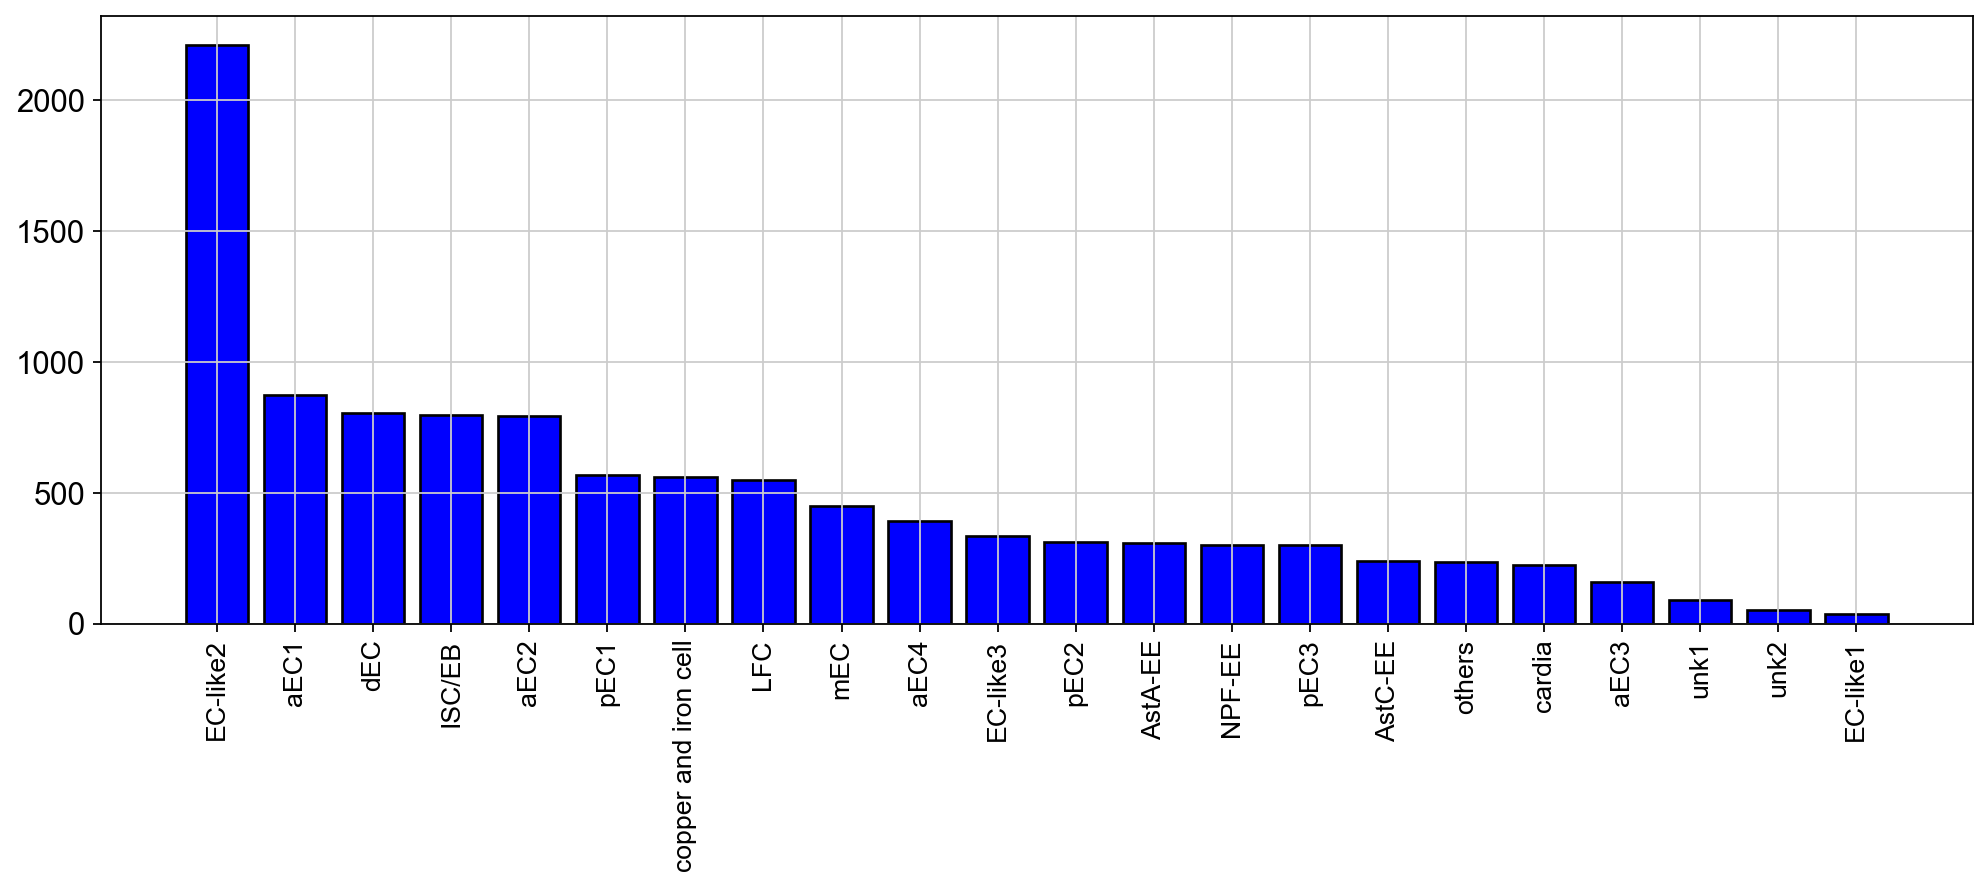

In [9]:
# Make a plot with cell types 
#Create a barplot of the number of cells per cell type in the anndata_pediatric object
plt.figure(figsize = (15, 5))
plt.bar(adata.obs["celltype"].value_counts().index, adata.obs["celltype"].value_counts(), color = "blue", edgecolor = "black", linewidth = 1.2)
plt.xticks(rotation = 90, fontsize = 12)